### Use a Random Forests Classifier to determine the Top 5 features for classifying popularity

In [1]:
# import relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [2]:
# import dataframe from spotify-EDA file

streams_df = pd.read_csv(r'/Users/adityamxr/Desktop/spotify-time-series/data-analysis/streams_df_preprocessing.csv')

In [3]:
# verify import
streams_df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,cleaned_broad_genre
0,0.995,0.708,158648,0.1950,0,0.563,0.1510,-12.428,1,0,0.0506,118.469,0.7790,1928,unknown
1,0.994,0.379,282133,0.0135,0,0.901,0.0763,-28.454,1,0,0.0462,83.972,0.0767,1928,early music
2,0.604,0.749,104300,0.2200,0,0.000,0.1190,-19.924,0,0,0.9290,107.177,0.8800,1928,epicore
3,0.995,0.781,180760,0.1300,0,0.887,0.1110,-14.734,0,0,0.0926,108.003,0.7200,1928,tango
4,0.990,0.210,687733,0.2040,0,0.908,0.0980,-16.829,1,1,0.0424,62.149,0.0693,1928,classical


In [4]:
# before encoding the cleaned_broad_genre feature, create copy of dataframe

encoded_df = streams_df.copy()

# initalize LabelEncoder()
label_enc = LabelEncoder()
encoded_df['labelenc_genre'] = label_enc.fit_transform(encoded_df['cleaned_broad_genre'])

# verify encoded genre
encoded_df['labelenc_genre'].head(5)

0    500
1    138
2    149
3    477
4     96
Name: labelenc_genre, dtype: int64

In [5]:
# save encoded dataframe
encoded_df.to_csv('label_encoded_streams_df.csv', index =False)

In [10]:
# check for missing values in encoded_df
print('Number of missing values in encoded dataframe: \n', encoded_df.isnull().sum())

Number of missing values in encoded dataframe: 
 acousticness           0
danceability           0
duration_ms            0
energy                 0
explicit               0
instrumentalness       0
liveness               0
loudness               0
mode                   0
popularity             0
speechiness            0
tempo                  0
valence                0
year                   0
cleaned_broad_genre    0
labelenc_genre         0
dtype: int64


In [11]:
# summary statistics for the popularity column to ascertain bin size
print(encoded_df['popularity'].describe())

count    169909.000000
mean         31.556610
std          21.582614
min           0.000000
25%          12.000000
50%          33.000000
75%          48.000000
max         100.000000
Name: popularity, dtype: float64


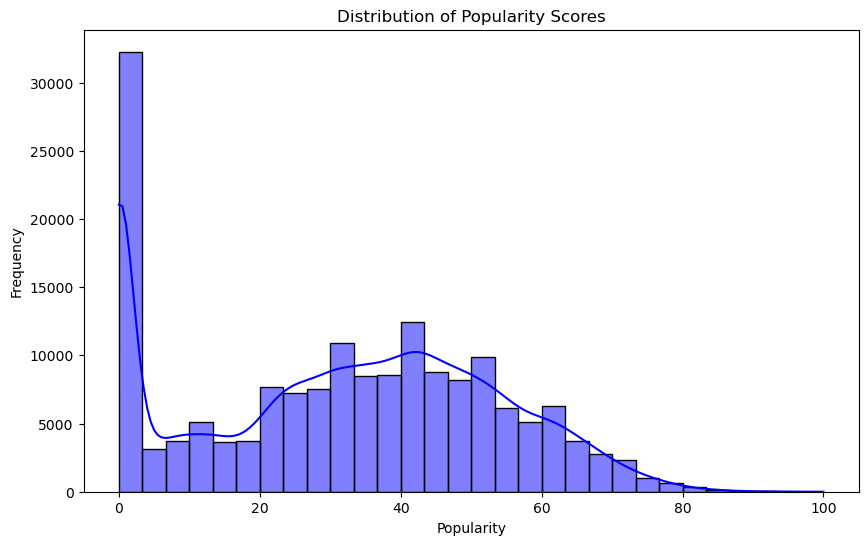

In [12]:
# plot the distribution of popularity to ascertain bin size
plt.figure(figsize=(10, 6))
sns.histplot(encoded_df['popularity'], bins=30, kde=True, color='blue')
plt.title('Distribution of Popularity Scores')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()